In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns=999
pd.options.display.max_rows=999


import plotly.express as px
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

In [118]:
df        = pd.read_csv('../data/SIHSUS/sihsus_estabelecimento.csv')

hospitais = pd.read_csv('../data/Codigos/gmaps_cnes_hospital.csv')
# hospitais = hospitais.rename(columns={'hospital':'co_cnes'})

In [119]:
df['hospital'] = df['Estabelecimento'].apply(lambda x: x[8:]).str.strip()
df['co_cnes'] = pd.to_numeric(df['Estabelecimento'].apply(lambda x: x[:8]).str.strip(), errors='coerce')
df['Data'] = pd.to_datetime(df['ano'].astype(str) + "-" + df['mes'].astype(str))

mask = df['Estabelecimento']!='Total'

df = df[mask]

In [120]:
cols = ['co_cnes','lat','lng','administrative_area_level_2']
df_hospitais = pd.merge(hospitais[cols], df, on='co_cnes', how='right')
# df_hospitais = pd.merge(municipios, df_hospitais, how='right', left_on='geocodigo',right_on='co_ibge')


In [19]:
ano = 2019
mes = 9

mask = (df_hospitais['ano']==ano) & (df_hospitais['mes']==mes) & (df_hospitais['lat'].notnull())

hospitais_assis = df_hospitais[mask]


locations = hospitais_assis[['lat', 'lng']]
locationlist = locations.values.tolist()

In [20]:
map2 = folium.Map(location=[-22.157651, -48.054817], zoom_start=7, tiles='CartoDB dark_matter')

marker_cluster = MarkerCluster().add_to(map2)


variavel = 'AIH aprovadas'

hospitais_assis['var'] = pd.to_numeric(hospitais_assis[variavel], errors='coerce').fillna(1)


variable = hospitais_assis[variavel].tolist()
var      = hospitais_assis['var'].tolist()
hospitais = hospitais_assis['hospital'].tolist()
municipio = hospitais_assis['administrative_area_level_2'].tolist()


factor = 30/max(var)

for i in range(0, len(locationlist)):
    string = "Municipio: " + str(municipio[i]) +  '<br>' '<br>'+ str(hospitais[i]) +  '<br>' '<br>'+ str(variavel) + ": " + str(variable[i])
#     print(string)
#     
    folium.Marker(locationlist[i], popup=(string),).add_to(marker_cluster)
    
    folium.CircleMarker(location=locationlist[i],
                            radius= var[i] * factor,
                            color="#007849",
                            popup=string,
                            fill=False).add_to(map2)
#     print(var[i])

# HeatMap(data=hospitais_assis[['lat','lng','var']].values.tolist(), radius=20, max_zoom=13).add_to(map2)

    
map2

/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
hospitais_assis.head()

co_cnes        lat        lng administrative_area_level_2  \
140   8494.0 -23.640786 -46.527860                 Santo André   
281   9296.0 -23.557541 -46.669993                   São Paulo   
422   9539.0 -23.204991 -45.887396         São José dos Campos   
563   9601.0 -23.163136 -45.900275         São José dos Campos   
704   9695.0 -23.200881 -45.887880         São José dos Campos   

                                       Estabelecimento AIH aprovadas  \
140                                  0008494 UPA BANGU           212   
281                 0009296 HOSPITAL DE CLINICAS NORTE             -   
422  0009539 IPMMI HOSPITAL MATERNO INFANTIL ANTONI...             -   
563                           0009601 HOSPITAL PIO XII           392   
704  0009695 CENTRO DE REFERENCIA EM MOLESTIAS INFE...             8   

    Internações Valor total Valor serviços hospitalares  \
140         212    88106.63                    76818.66   
281           -           -                           -   
422           -           -                           -   
563         392  1399105.14                  1163298.92   
704           8     1876.00                     1632.00   

    Val serv hosp - compl federal Val serv hosp - compl gestor  \
140                             -                            -   
281                             -                            -   
422                             -                            -   
563                             -                            -   
704                             -                            -   

    Valor serviços profissionais Val serv prof - compl federal  \
140                     11287.97                             -   
281                            -                             -   
422                            -                             -   
563                    235806.22                             -   
704                       244.00                             -   

    Val serv prof - compl gestor Valor médio AIH Valor médio intern  \
140                            -          415.60             415.60   
281                            -             ...                ...   
422                            -             ...                ...   
563                            -         3569.15            3569.15   
704                            -          234.50             234.50   

    Dias permanência Média permanência Óbitos Taxa mortalidade   ano  mes  \
140              655               3.1     40            18.87  2019    9   
281                -               ...      -              ...  2019    9   
422                -               ...      -              ...  2019    9   
563             1949               5.0     50            12.76  2019    9   
704              232              29.0      -                -  2019    9   

                                              hospital       Data    var  
140                                          UPA BANGU 2019-09-01  212.0  
281                         HOSPITAL DE CLINICAS NORTE 2019-09-01    1.0  
422  IPMMI HOSPITAL MATERNO INFANTIL ANTONINHO DA R... 2019-09-01    1.0  
563                                   HOSPITAL PIO XII 2019-09-01  392.0  
704      CENTRO DE REFERENCIA EM MOLESTIAS INFECCIOSAS 2019-09-01    8.0

/home/m/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



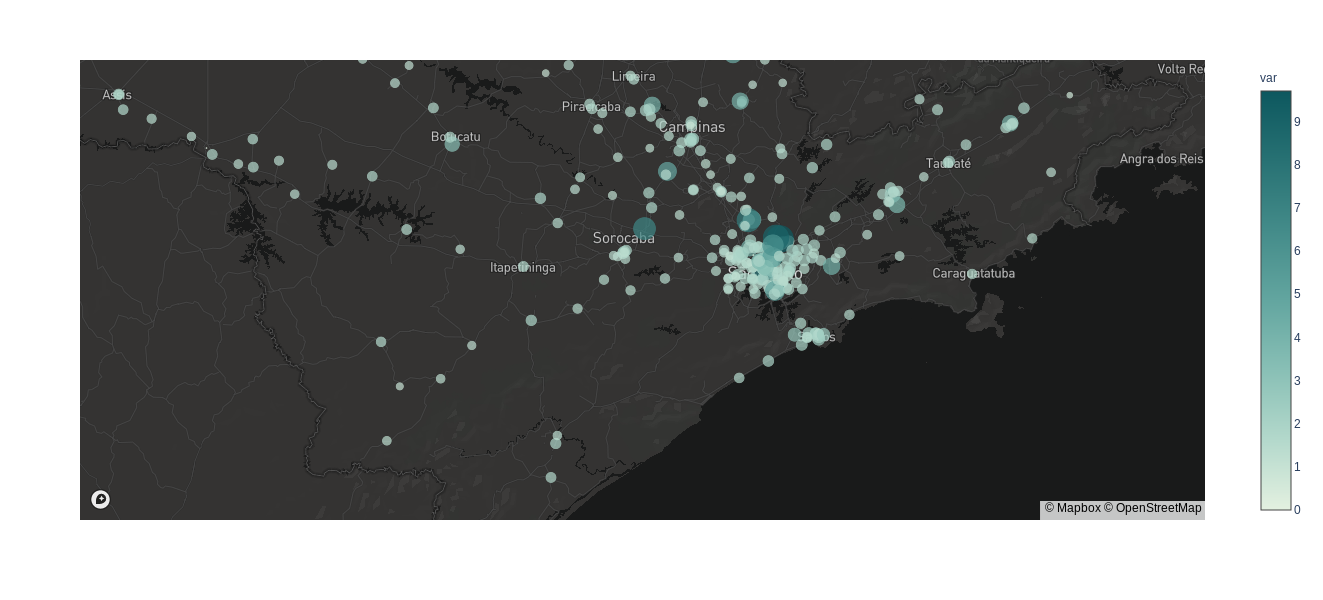

In [63]:


import plotly.express as px
token = open("../../../mapbox_token").read()

variavel = 'Média permanência'

hospitais_assis['var'] = np.log(pd.to_numeric(hospitais_assis[variavel], errors='coerce').fillna(0) +1 )

dd="var"
fig = px.scatter_mapbox(hospitais_assis, lat="lat", lon="lng", color="var", size="var", hover_name='hospital',
                        color_continuous_scale=px.colors.carto.Mint, size_max=20, zoom=5)

fig.update_layout(mapbox_style="dark", mapbox_accesstoken=token)
fig.show()



### Graphs

In [162]:
from ipywidgets import interact

In [167]:
df_hospitais.columns

Index(['co_cnes', 'lat', 'lng', 'administrative_area_level_2',
       'Estabelecimento', 'AIH aprovadas', 'Internações', 'Valor total',
       'Valor serviços hospitalares', 'Val serv hosp - compl federal',
       'Val serv hosp - compl gestor', 'Valor serviços profissionais',
       'Val serv prof - compl federal', 'Val serv prof - compl gestor',
       'Valor médio AIH', 'Valor médio intern', 'Dias permanência',
       'Média permanência', 'Óbitos', 'Taxa mortalidade', 'ano', 'mes',
       'hospital', 'Data'],
      dtype='object')

In [168]:
cidades = df_hospitais['administrative_area_level_2'].unique().tolist()
variaveis = ['AIH aprovadas', 'Internações', 'Valor total',
       'Valor serviços hospitalares', 'Val serv hosp - compl federal',
       'Val serv hosp - compl gestor', 'Valor serviços profissionais',
       'Val serv prof - compl federal', 'Val serv prof - compl gestor',
       'Valor médio AIH', 'Valor médio intern', 'Dias permanência',
       'Média permanência', 'Óbitos', 'Taxa mortalidade']

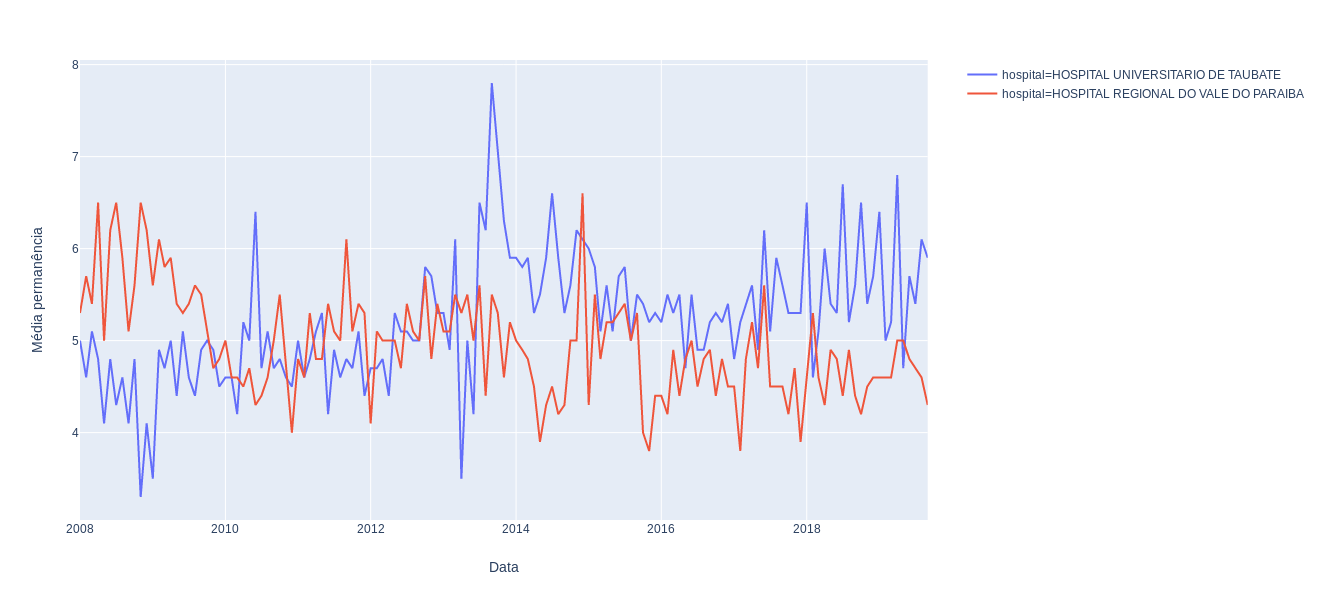

In [18]:

mask = df_hospitais['administrative_area_level_2']=='Taubaté'

px.line(df_hospitais[mask], x = 'Data', y='Valor total', color='hospital')
px.line(df_hospitais[mask], x = 'Data', y='Média permanência', color='hospital')